# Project 2: Investigating The Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href='#about_dataset'>About Dataset</a></li>
<li><a href='#question'>Question Researched</a></li>
<li><a href="#exploration">Data Exploration</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitation</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I am using TMDb dataset and apply Data Analysis to figure out what exactly makes a movie a “success".  

With the growing demand of new movies and the wide range of movie genres, analytics about the performance of movies can give useful information to studios so that they can make the most strategic decisions regarding production and financing. 

<a id='about_dataset'></a>
## About Dataset

The dataset for this analysis was provided by Udacity and it was also available on Kaggle. 

The dataset contains information of about 5000+ movies. 

It contains basic information like cast, director, keywords, runtime, genres, etc. Any of these basic information can be a key parameter to a success movie.

It also has movie matrices including user ratings, popularity and revenue. These metrics helps to figure out how successful these movies are.

<a id='question'></a>
## Question Researched

1. Movie Demands Over Years.
2. Movie Popularity in Different Revenue Scale in Recent 10 Years.
3. Distribution of Revenue in Different Score Rating Levels in 10 Years.
4. What kinds of properties are associated with movies that have high popularity?
5. Number of Movies Released Over Years.
6. Keywords Trends by Generation.
7. Genres Trends by Generation.

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

<a id='exploration'></a>
## Data Exploration

In [2]:
# Loading data and read out a few lines
tmdb_df = pd.read_csv('tmdb-movies.csv')

tmdb_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The `cast`, `keywords`, `genres` and `production_companies` columns contains multiple values separated by **|** character. 

In [3]:
# basic information about dataset
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset contains 10866 entries and 21 columns.

The data types of all the columns are correct.

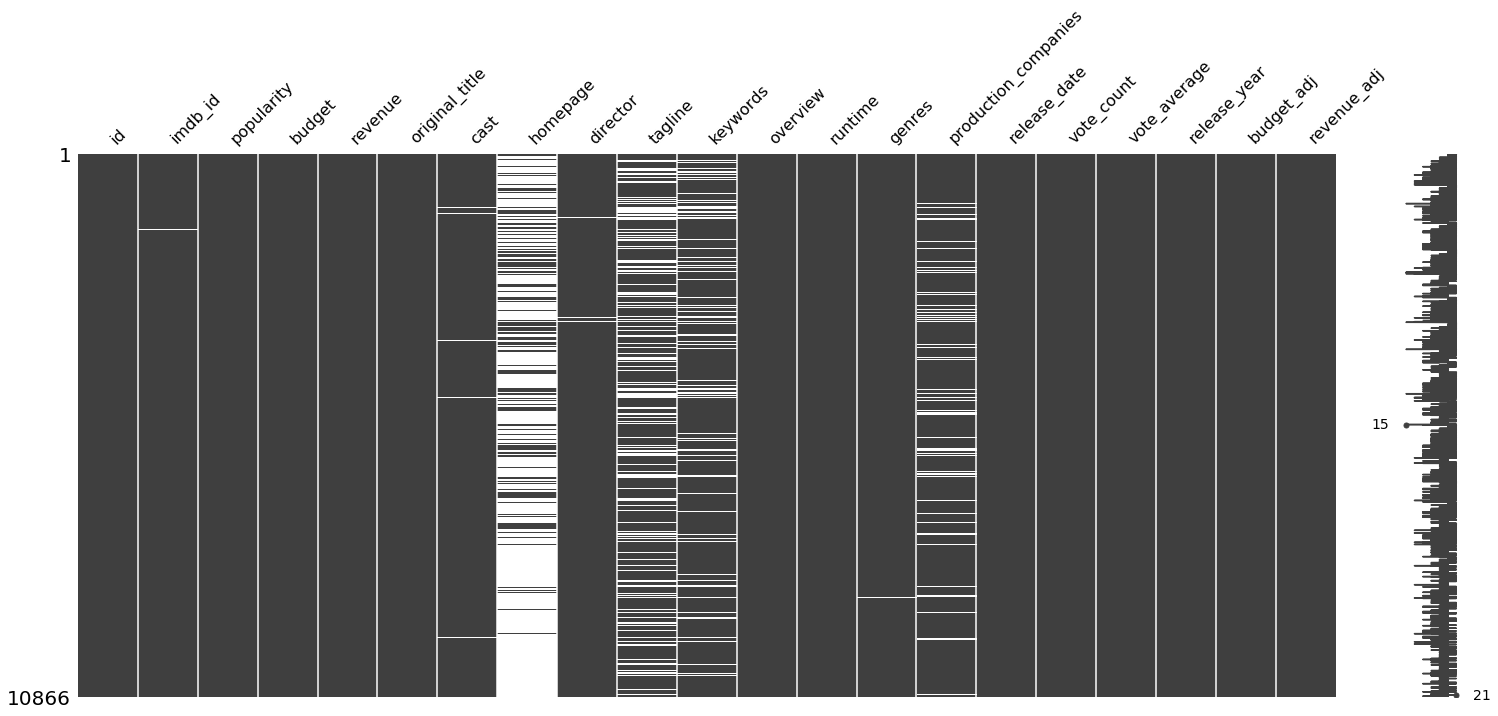

In [4]:
# visualizing missing values as a matrix
msno.matrix(tmdb_df);

In [5]:
# identifying amount of missing values in each column
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are small amount of missing value in `imdb_id`, `cast`, `director`, `overview` and `genres` columns.

There are also some columns with a lot of missing values like `homepage`, `tagline`, `keywords` and `production_companies`.

Some columns like `imdb_id`, `homepage`, `overview`, `tagline`, `budget_adj` and `revenue_adj` are not so important for analysis so I simply drop them.

In [6]:
# checking for duplicates entries
sum(tmdb_df.duplicated())

1

In [7]:
# viewing duplicate rows
tmdb_df[tmdb_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Dataset contains only one entries which is duplicated.

In [8]:
# viewing descriptive statistics of the dataset
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are a lot of zeros in `budget` and `revenue` columns about 50% of the column. 

There are also some zeros `inruntime` column.

I found that all columns which has zeros have minimum released year of 1960 and and there is no null values in that columns. So, I take a look for zeros data to decide whether it is just a missing value or minimum value.

**Zero Values in Budget Columns**

In [9]:
# checking number of zeros values in budget column
tmdb_df[tmdb_df['budget']==0].shape

(5696, 21)

In the `budget` cloumn, there are 5696 entries which has zero value. And 5696 is a huge amount. If I dropped them then I loose too many raw data. In order to keep the data integrity, I decide to keep these rows and replace zero values with null values.

**Zero Values in Revenue Columns**

In [10]:
# checking number of zeros in revenue column
tmdb_df[tmdb_df['revenue']==0].shape

(6016, 21)

Revenue column contains 6016 zeros values which is also a huge amount. So I decide to keep these rows.

**Zero Values in Runtime Columns**

In [11]:
# checking number of zeros in runtime column
tmdb_df[tmdb_df['runtime']==0].shape

(31, 21)

Runtime column contains 31 zeros entries which is a small amount so it can be droped.

### Documenting Issuses

* Drop unnecessary columns: `homepage`, `tagline`, `imdb_id`, `overview`, `budget_adj`, `revenue_adj`.
* Drop duplicates entries.
* Drop null values columns that has small amount of nulls: `cast`, `director`, and `genres`.
* Replace zero values with null values in the `budget` and `revenue` columns.
* Drop zero values in `runtime` column.

<a id='cleaning'></a>
## Data Cleaning

**Dropping unnecessary columns**

In [12]:
# list of unnecessary columns to drop
drop_col = ['homepage', 'tagline', 'imdb_id', 'overview','budget_adj', 'revenue_adj']

In [13]:
# dropping unnecessary columns
tmdb_df.drop(drop_col, axis=1, inplace=True)

In [14]:
tmdb_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


**Dropping duplicate entries**

In [15]:
# dropping duplicate
tmdb_df.drop_duplicates(inplace=True)

**Dropping null values in cast, director, genres columns**

In [16]:
# list of columns that have small amount of null values
null_col = ['cast', 'director', 'genres']

In [17]:
# dropping null values
tmdb_df.dropna(subset=null_col, inplace=True)

In [18]:
# confirming null value dropped
tmdb_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

**Replacing zeros with null values in the budget and revenue columns**

In [19]:
# replacing zeros with nan in budget column
tmdb_df['budget'] = tmdb_df['budget'].replace(0, np.NaN)

In [20]:
# replacing zeros with nan in revenue column
tmdb_df['revenue'] = tmdb_df['revenue'].replace(0, np.NaN)

**Dropping zeros in runtime column**

In [21]:
# dropping zeros in runtime column
tmdb_df.query('runtime != 0', inplace=True)

In [22]:
# checking no entries with zero values
tmdb_df[tmdb_df['runtime']==0]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


<a id='eda'></a>
## Exploratory Data Analysis
### 1. Movie Demands Over Years

I calculated the mean of popularity for each released year and then plot line chart to see the popularity trend.

In [23]:
# calculating mean of popularity and groupby each release year
popularity_mean = tmdb_df.groupby('release_year').mean()['popularity']

Plotting line chart to see popularity trend.

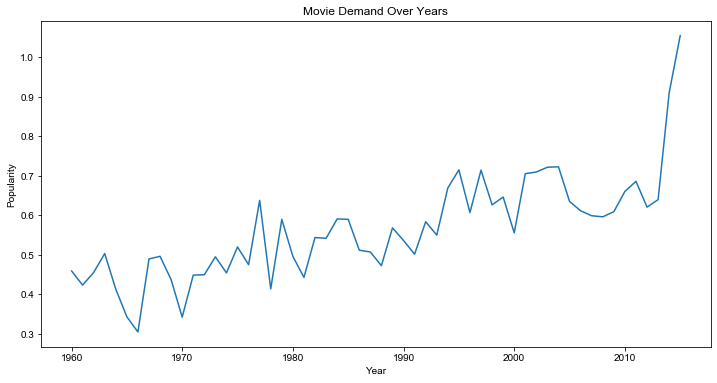

In [24]:
#creating matplotlib figure and axes
fig, ax = plt.subplots(figsize = (12,6))

# set plot style to whitegrid
sns.set_style("whitegrid")

#x and y axis
x, y = popularity_mean.index, popularity_mean

# plotting line chart
plt.plot(x, y)

#set title
plt.title('Movie Demand Over Years')

#set labels
plt.xlabel('Year')
plt.ylabel('Popularity')

#show plot
plt.show()

**Observations**
* Popularity of movies is increasing over years specially after 2011.
* This is due to stream of movies on various flatform, low cost of television and channel prices.

### 2. Movie Popularity in Different Revenue Scale in Recent 10 Years

For this I divide the revenue data into four labels: Low, Medium, High, Very High according to their quartile.

In [25]:
#defining quartile function
def div_into_quartile(df, col):
    
    #finding quartile values
    min_value = df[col].min()
    first_quartile = df[col].quantile(0.25)
    second_quartile = df[col].quantile(0.50)
    third__quartile = df[col].quantile(0.75)
    max_value = df[col].max()
    
    #used to divide data into groups
    quartile_value = [min_value, first_quartile, second_quartile, third__quartile, max_value]
    
    #label names for group
    bin_names = ['Low', 'Medium', 'High', 'Very High']
    
    #create revenue label column
    name = '{}_levels'.format(col)
    df[name] = pd.cut(df[col], quartile_value, labels = bin_names, include_lowest = True)
    
    #return dataframe 
    return df

Then dividing the revenue label by each year's revenue quartile.

In [26]:
#list of recent 10 years
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

#creating empty dataframe
quartile_df = pd.DataFrame()

#iterate each year
for year in years:
    # create dataframe with the selected year
    tmdb_df_year = tmdb_df[tmdb_df['release_year']==year].copy(deep=True)
    
    #apply function to avobe tmdb_df_year and store it to q_df
    q_df = div_into_quartile(tmdb_df_year,'revenue') 
    
    #append q_df to quartile_df
    quartile_df = quartile_df.append(q_df)

In [27]:
quartile_df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_levels
6554,834,5.838503,50000000.0,1.113408e+08,Underworld: Evolution,Kate Beckinsale|Scott Speedman|Tony Curran|Sha...,Len Wiseman,budapest|key|light|werewolf|evolution,106,Fantasy|Action|Science Fiction|Thriller,Lakeshore Entertainment|Screen Gems,1/12/06,1015,6.3,2006,Very High
6555,58,4.205992,200000000.0,1.065660e+09,Pirates of the Caribbean: Dead Man's Chest,Johnny Depp|Orlando Bloom|Keira Knightley|Bill...,Gore Verbinski,witch|fortune teller|bondage|exotic island|mon...,151,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,6/20/06,3181,6.8,2006,Very High
6556,920,3.941265,120000000.0,4.619831e+08,Cars,Owen Wilson|Paul Newman|Bonnie Hunt|Larry the ...,John Lasseter|Joe Ranft,car race|car journey|village and town|road|auto,117,Animation|Adventure|Comedy|Family,Walt Disney Pictures|Pixar Animation Studios,6/8/06,2336,6.4,2006,Very High


In [28]:
# group quartile_df with each revenue levels in each year and find the popularity mean
quartile_df_summary = quartile_df.groupby(['release_year','revenue_levels']).mean()

In [29]:
quartile_df_summary

id  popularity        budget  \
release_year revenue_levels                                            
2006         Low              10627.769231    0.454318  1.303577e+07   
             Medium           10006.117647    0.551227  2.240821e+07   
             High              7683.117647    0.782092  3.797826e+07   
             Very High         5127.115385    1.744680  7.519608e+07   
2007         Low              11529.183673    0.392945  1.083412e+07   
             Medium           13447.125000    0.626207  2.527048e+07   
             High              5371.708333    0.978178  3.392845e+07   
             Very High         6113.224490    1.714805  8.586490e+07   
2008         Low              15747.134615    0.386266  9.948000e+06   
             Medium           13193.490196    0.616014  1.934720e+07   
             High             12288.196078    0.910568  3.551304e+07   
             Very High         8437.313725    1.972135  8.587843e+07   
2009         Low              27216.940000    0.464524  9.633750e+06   
             Medium           20323.040000    0.708317  2.109778e+07   
             High             17035.760000    0.994032  3.765881e+07   
             Very High        15948.000000    2.101592  9.299184e+07   
2010         Low              47733.781818    0.379462  7.692143e+06   
             Medium           42155.648148    0.693976  2.594224e+07   
             High             33846.518519    0.945479  3.446731e+07   
             Very High        29490.388889    2.155273  9.840741e+07   
2011         Low              63196.000000    0.480954  6.527986e+06   
             Medium           64244.216667    0.713924  1.787702e+07   
             High             52825.083333    1.123496  3.539825e+07   
             Very High        55115.133333    1.987352  8.944167e+07   
2012         Low             104526.240741    0.356172  9.741668e+06   
             Medium           95131.870370    0.641800  1.414218e+07   
             High             75272.811321    1.028943  3.095833e+07   
             Very High        68187.629630    2.573075  1.000093e+08   
2013         Low             163014.131148    0.442273  7.811928e+06   
             Medium          148632.524590    0.776672  1.678304e+07   
             High            127849.442623    1.182148  3.030536e+07   
             Very High       100778.180328    2.338144  9.780328e+07   
2014         Low             232927.315789    0.658621  5.082375e+06   
             Medium          222570.719298    1.116157  1.043974e+07   
             High            201590.517857    1.806969  3.079245e+07   
             Very High       163114.192982    4.542607  9.251404e+07   
2015         Low             288091.296296    0.672883  7.802640e+06   
             Medium          268269.129630    1.224921  1.779000e+07   
             High            267348.962963    2.017584  2.311923e+07   
             Very High       219819.685185    5.369140  9.754528e+07   

                                  revenue     runtime   vote_count  \
release_year revenue_levels                                          
2006         Low             2.622043e+06  100.076923    66.711538   
             Medium          1.907194e+07  105.627451    97.000000   
             High            5.591687e+07  107.666667   241.882353   
             Very High       2.368262e+08  113.980769   913.192308   
2007         Low             2.995286e+06  100.408163    60.959184   
             Medium          2.173509e+07  105.958333   168.791667   
             High            6.831734e+07  112.208333   368.270833   
             Very High       3.049465e+08  109.775510  1059.755102   
2008         Low             1.854578e+06   97.576923    48.365385   
             Medium          1.975378e+07  109.470588   128.647059   
             High            6.552214e+07  107.156863   319.058824   
             Very High       2.936311e+08  108.941176  1271.333333   
2009         Low             1.6772

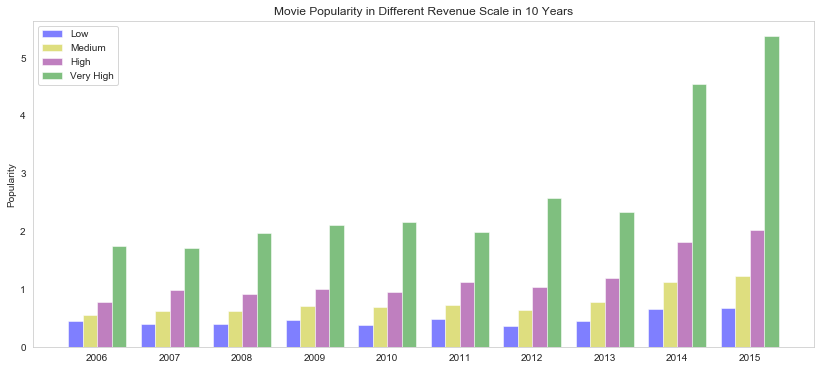

In [30]:
#Setting positions & width of bars
pos = list(range(len(quartile_df_summary.query('revenue_levels =="Low"'))))
width = 0.2 

#Plotting bars
fig, ax = plt.subplots(figsize=(14,6))

# Create bar with Low data
plt.bar(pos, 
        quartile_df_summary.query('revenue_levels =="Low"')['popularity'], 
        width, 
        alpha=0.5, 
        color='b', 
        label= 'Low') 

# Create bar with Medium data
plt.bar([p + width for p in pos], 
        quartile_df_summary.query('revenue_levels =="Medium"')['popularity'],
        width, 
        alpha=0.5, 
        color='y', 
        label='Medium') 

# Create bar with Moderately High data,
plt.bar([p + width*2 for p in pos], 
        quartile_df_summary.query('revenue_levels =="High"')['popularity'], 
        width, 
        alpha=0.5, 
        color='#800080',
        label='High') 

# Create a bar with High data,
plt.bar([p + width*3 for p in pos], 
        quartile_df_summary.query('revenue_levels =="Very High"')['popularity'], 
        width, 
        alpha=0.5, 
        color='g',
        label='Very High')

# Set y axis label
ax.set_ylabel('Popularity')

# Set title
ax.set_title('Movie Popularity in Different Revenue Scale in 10 Years')

# Set x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set labels for x ticks
ax.set_xticklabels([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])

# Adding the legend and showing the plot
plt.legend()
plt.grid()
plt.show()

**Observation**
* From bar chart it is clear that movies which has higher revenue level are more popular in recent ten years.


### 3. Distribution of Revenue in Different Score Rating Levels in Recent 10 Years.

I use the same procedure.

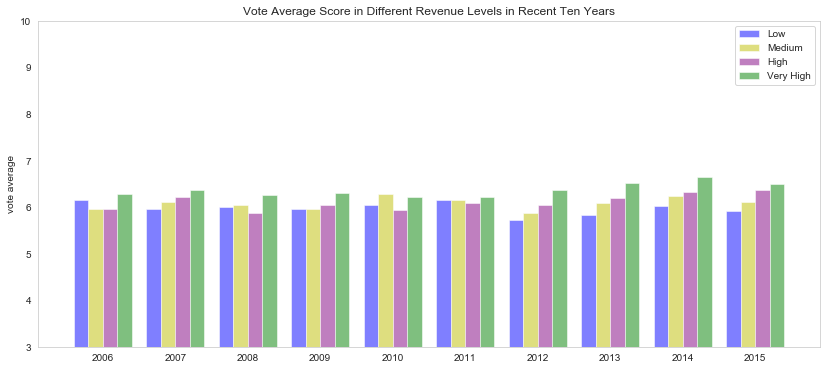

In [31]:
#Setting positions & width of bars
pos = list(range(len(quartile_df_summary.query('revenue_levels =="Low"'))))
width = 0.2 

#Plotting bars
fig, ax = plt.subplots(figsize=(14,6))

# Create bar with Low data
plt.bar(pos, 
        quartile_df_summary.query('revenue_levels =="Low"')['vote_average'], 
        width, 
        alpha=0.5, 
        color='b', 
        label= 'Low') 

# Create bar with Medium data
plt.bar([p + width for p in pos], 
        quartile_df_summary.query('revenue_levels =="Medium"')['vote_average'],
        width, 
        alpha=0.5, 
        color='y', 
        label='Medium') 

# Create bar with Moderately High data,
plt.bar([p + width*2 for p in pos], 
        quartile_df_summary.query('revenue_levels =="High"')['vote_average'], 
        width, 
        alpha=0.5, 
        color='#800080',
        label='High') 

# Create a bar with High data,
plt.bar([p + width*3 for p in pos], 
        quartile_df_summary.query('revenue_levels =="Very High"')['vote_average'], 
        width, 
        alpha=0.5, 
        color='green',
        label='Very High')

# Set y axis label
ax.set_ylabel('vote average')

# Set title
ax.set_title('Vote Average Score in Different Revenue Levels in Recent Ten Years')

# Set x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set labels for x ticks
ax.set_xticklabels([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])

#set y-axis height
plt.ylim(3, 10)

# Adding the legend and showing the plot
plt.legend()
plt.grid()
plt.show()

**Observation**
* From the bar chart above, it is clear that there is not much difference between movie rating and each revenue level. 
* So it can be concluded that high revenue movies don't have significant high score rating.

### 4. What kinds of properties are associated with movies that have high popularity?

This question further contains sub-questions.<br>

  **4.1  What are the budget level movie associated with movies that have high popularity?**<br>
  **4.2  What are the runtime of movie associated with movies that have high popularity?**<br>
  **4.3  What are the casts, directors, keywords, genres and production companies associated with high popularity movie?**

**4.1 What are the budget level movie associated with movies that have high popularity?**

I divide the budget data into four parts with its quartile value: 'Low', 'Medium', 'Moderately High', 'High' by using `div_into_quartile()` function and create `budget_level` column.

In [32]:
# using div_into_quantile() function to divide budget column
budget_q = div_into_quartile(tmdb_df,'budget')

budget_q.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Very High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,Very High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,Very High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,Very High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,Very High


Creating `budget_levels` columns.

In [33]:
# creating budget_level and finding the mean and median popularity of each level with groupby
result_mean = tmdb_df.groupby('budget_levels')['popularity'].mean()

result_median = tmdb_df.groupby('budget_levels')['popularity'].median()

In [34]:
result_mean

budget_levels
Low          0.510678
Medium       0.726490
High         0.988660
Very High    1.821742
Name: popularity, dtype: float64

In [35]:
result_median

budget_levels
Low          0.367621
Medium       0.507987
High         0.733975
Very High    1.232098
Name: popularity, dtype: float64

Plotting bars

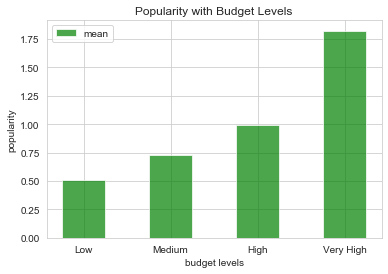

In [36]:
# x locations for the groups
index = np.arange(len(result_mean))  

# width of the bars
width = 0.5 

#set style to whitegrid
sns.set_style('whitegrid')

bars = plt.bar(index, result_mean, width, color='g', alpha=0.7, label='mean')

# adding title and label
plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')


labels = result_median.index  
plt.xticks(index, labels)

# adding legend
plt.legend()

plt.show()

**Observation**
* Movies with higher popularity are of higher budget level. This is due to more money is spent on movie promotion.

**4.2 What are the runtime of movies associated with movies that have high popularity?**

Similary, I divide the runtime data into four parts with its quartile value: 'Low', 'Medium', 'Moderately High', 'High' by using `div_into_quartile()` function and creating `runtime_level` column.

In [37]:
# using div_into_quantile() function to divide runtime column
runtime_q = div_into_quartile(tmdb_df,'runtime')

runtime_q.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Very High,Very High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,Very High,Very High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,Very High,Very High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,Very High,Very High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,Very High,Very High


In [38]:
# creating runtime_level and finding the mean and median popularity of each level with groupby
result_mean = tmdb_df.groupby('runtime_levels')['popularity'].mean()

result_median = tmdb_df.groupby('runtime_levels')['popularity'].median()

In [39]:
result_mean

runtime_levels
Low          0.418723
Medium       0.551560
High         0.656342
Very High    1.019749
Name: popularity, dtype: float64

In [40]:
result_median

runtime_levels
Low          0.290399
Medium       0.366125
High         0.420568
Very High    0.529933
Name: popularity, dtype: float64

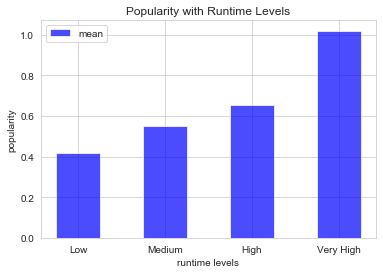

In [41]:
# x locations for the groups
index = np.arange(len(result_mean))  

# width of the bars
width = 0.5 

#set style to whitegrid
sns.set_style('whitegrid')

bars = plt.bar(index, result_mean, width, color='b', alpha=0.7, label='mean')

# adding title and label
plt.ylabel('popularity')
plt.xlabel('runtime levels')
plt.title('Popularity with Runtime Levels')

labels = result_median.index  
plt.xticks(index, labels)

# adding legend
plt.legend()

plt.show()

**Obsevation**
* Higher popularity movies have longer run time.

**4.3 What are the casts, directors, keywords, genres and production companies associated with high popularity movie?**

First, I define a function that split string that contains multiple value separated by **|** character and counts the number of times factor appered and then select only top 3 factors.

In [42]:
# defining function
# num is the number of top factor
def top_factors(col, num=3):
    
    # make list of factors
    factor_list = col.str.cat(sep='|').split('|')
    
    # convert to dataframe
    factor_df = pd.DataFrame({'top' :factor_list})
    
    # count number of times appeared and choose the top 3 factor
    top3 = factor_df['top'].value_counts().head(num)
    
    return top3

I filtering top 100 and worst 100 movies.

**Selecting top 100 popular movies**

In [43]:
# first sort release_year by ascending and popularity by descending order
top_popular_100 = tmdb_df.sort_values(['release_year','popularity'], ascending=[True, False])

# group by year and choose the top 100 
top_popular_100 = top_popular_100.groupby('release_year').head(100).reset_index(drop=True)

top_popular_100.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,Low,High
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960,Low,Very High
2,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,Medium,Very High
3,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,Low,Very High
4,24014,0.875173,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,musical,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,4.9,1960,NaN,Very High


**Selecting top 100 unpopular movies**

Finding the three highest occurrences in each category among the top 100 popular movies and store the result table into variables in order to create a summary table.

In [44]:
# finding top three cast
a = top_factors(top_popular_100.cast)

# finding top three director
b = top_factors(top_popular_100.director)

# finding top three keywords
c = top_factors(top_popular_100.keywords)

# finding top three genres
d = top_factors(top_popular_100.genres)

# finding top three production companies
e = top_factors(top_popular_100.production_companies)

In [45]:
#using the result above to create a summary dataframe
df_popular = pd.DataFrame({'popular_cast': a.index, 'popular_director': b.index, 'popular_keywords': c.index, 'popular_genres': d.index, 'popular_producer': e.index})
df_popular

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Robert De Niro,Woody Allen,based on novel,Drama,Warner Bros.
1,Bruce Willis,Steven Spielberg,sex,Comedy,Universal Pictures
2,Michael Caine,Martin Scorsese,dystopia,Thriller,Paramount Pictures


 Finding the three highest occurrences in each category among the 100 unpopular movies.

In [46]:
# first sort release_year and popularity by ascending order
last_popular_100 = tmdb_df.sort_values(['release_year','popularity'], ascending=[True, True])

# group by year and choose the top 100 
last_popular_100 = last_popular_100.groupby('release_year').head(100).reset_index(drop=True)

last_popular_100.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,12/18/60,13,7.2,1960,Low,Medium
1,39890,0.065808,NaN,NaN,The City of the Dead,Christopher Lee|Dennis Lotis|Patricia Jessel|T...,John Llewellyn Moxey,witch|burning of witches|witch burning|witchcraft,76,Horror,Vulcan Productions Inc.,9/9/60,13,6.1,1960,NaN,Low
2,29756,0.110511,NaN,NaN,13 Ghosts,Charles Herbert|Jo Morrow|Martin Milner|Rosema...,William Castle,haunted house,85,Horror,Columbia Pictures|William Castle Productions,8/5/60,12,5.5,1960,NaN,Low
3,15788,0.114188,NaN,10000000.0,The Bellboy,Jerry Lewis|Alex Gerry|Bob Clayton|Sonnie Sand...,Jerry Lewis,hotel|gag humor|madcap comedy|bellhop Â,72,Comedy|Family,Paramount Pictures|Jerry Lewis Productions,7/20/60,12,7.0,1960,NaN,Low
4,11773,0.127219,200000.0,NaN,Village of the Damned,George Sanders|Barbara Shelley|Martin Stephens...,Wolf Rilla,suicide|england|based on novel|parents kids re...,77,Horror|Science Fiction,Metro-Goldwyn-Mayer (MGM),7/1/60,28,7.0,1960,Low,Low


In [47]:
# finding top three cast among the 100 unpopular movies
f = top_factors(last_popular_100.cast)

# finding top three director among the 100 unpopular movies
g = top_factors(last_popular_100.director)

# finding top three keywords among the 100 unpopular movies
h = top_factors(last_popular_100.keywords)

# finding top three genres among the 100 unpopular movies
i = top_factors(last_popular_100.genres)

# finding top three production companies among the 100 unpopular movies
j = top_factors(last_popular_100.production_companies)

In [48]:
df_unpopular = pd.DataFrame({'unpopular_cast': f.index, 'unpopular_director': g.index, 'unpopular_keywords': h.index, 'unpopular_genres': i.index, 'unpopular_producer': j.index})

df_unpopular

,unpopular_cast,unpopular_director,unpopular_keywords,unpopular_genres,unpopular_producer
0,Clint Eastwood,Woody Allen,independent film,Drama,Universal Pictures
1,Michael Caine,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Harvey Keitel,Blake Edwards,sex,Thriller,Paramount Pictures


Now I campare the two tables and find out What casts, directors, keywords, genres and production companies are associated with high popularity.

**Observation**
* Cast associated with high popularity movies: Robert De Niro and Bruce Willis
* Director associated with high popularity movies: Steven Spielberg
* Both of the most popular and unpopular movies are associated three mainly genres: Drama, Comedy, and Thriller
* Keywords associated with high popularity movies: based on novel and dystopia
* Producer associated with high popularity movies and unpopularity movies: Warner Bros

## 5. Number of Movies Released Over Years

I group release_year and count the number of movie released in each year.

In [49]:
movie_count = tmdb_df.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Plotting chart

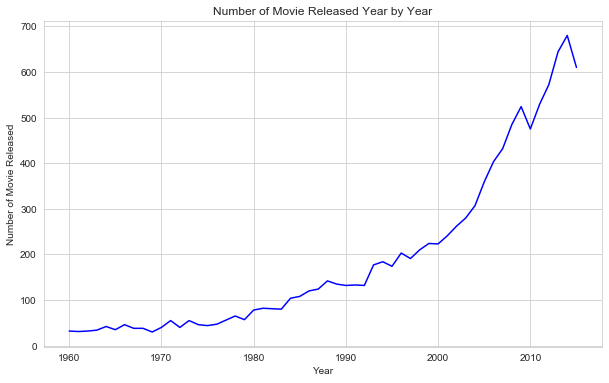

In [50]:
#set style
sns.set_style('whitegrid')

#set x, y axis
x = movie_count.index
y = movie_count

#set size
plt.figure(figsize=(10, 6))

#plot line chart 
plt.plot(x, y, color = 'b', label = 'mean')

#set title and labels
plt.title('Number of Movie Released Year by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

**Obsrvation**
* It can be seen that number of moving releasing is increasing year by year.

## 6. Keywords Trends by Generation

Sorting the movie release year to group the dataframe into generation.

In [51]:
# sort the movie release year list
year_list= tmdb_df.release_year.unique()
dfyear= np.sort(year_list)

Then, build the generation catagory of 1960s, 1970s, 1980s, 1990s and 2000s.

In [52]:
# 1960s
year_1960s =dfyear[:10]
# 1970s
year_1970s =dfyear[10:20]
# 1980s
year_1980s =dfyear[20:30]
# 1990s
year_1990s = dfyear[30:40]
# 2000
year_2000s = dfyear[40:]

For each generation dataframe, I use the top_factors() function to find out the most appeared keywords and then combine this result to a new datafram.

In [53]:
# year list of each generation
gen_list = [year_1960s, year_1970s, year_1980s, year_1990s, year_2000s]

# generation name
gen = ['1960s', '1970s', '1980s', '1990s', '2000s']

#creat a empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0

#for each generation
for s in gen_list:
    
    #filter dataframe with the selected generation, and store it to dfn
    dfn = tmdb_df[tmdb_df.release_year.isin(s)] 
    
    #apply the top_factors()  
    dfn2 = pd.DataFrame({'year' :gen[index],'top': top_factors(dfn.keywords,1)})
    
    #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index += 1

df_r3

,year,top
based on novel,1960s,16
based on novel,1970s,23
nudity,1980s,39
independent film,1990s,80
woman director,2000s,347


Now, I get the keywords of most filmed movies in each generation. In 1960s and 1970s, the top keywords was based on novel, which means movies with the keyword based on novel are released most according the dataset. In 1980s, the top keyword was nudity. In 1990s, independent film became the top keyword. And after 2000, the movie with the feature woman director were released most.

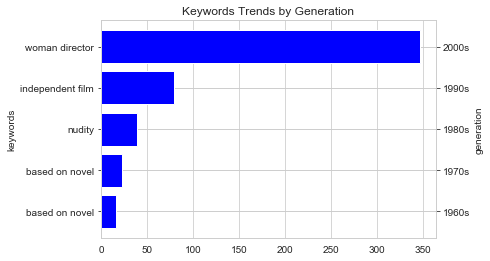

In [54]:
# Setting positions
generation = ['1960s', '1970s', '1980s', '1990s', '2000s']
keywords = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()

# Setting y1: the keywords number
y1 = df_r3.top

# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top

#plot the bar
ax.barh(y_pos,y1, color = 'b')

#set the left side y axis ticks position
ax.set_yticks(y_pos)

#set the left side y axis tick label
ax.set_yticklabels(keywords)

#set left side y axis label
ax.set_ylabel('keywords')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()

#plot the bar
ax2.barh(y_pos,y2, color = 'b')

#set the right side y axis ticks position
ax2.set_yticks(y_pos)

#set the right side y axis tick label
ax2.set_yticklabels(generation)

#set right side y axis label
ax2.set_ylabel('generation')

#set title
ax.set_title('Keywords Trends by Generation');

## 7. Genres Trends by Generation

Using the same procedure, first use the top_factors() function to find out the most appeared geners and then combine this result to a new datafram.

In [55]:
# year list of each generation
gen_list = [year_1960s, year_1970s, year_1980s, year_1990s, year_2000s]

# generation name
gen = ['1960s', '1970s', '1980s', '1990s', '2000s']

#creat a empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0

#for each generation
for s in gen_list:
    
    #filter dataframe with the selected generation, and store it to dfn
    dfn = tmdb_df[tmdb_df.release_year.isin(s)] 
    
    #apply the top_factors() 
    dfn2 = pd.DataFrame({'year' :gen[index],'top': top_factors(dfn.genres,1)})
    
    #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index += 1

df_r3

,year,top
Drama,1960s,167
Drama,1970s,238
Comedy,1980s,428
Drama,1990s,862
Drama,2000s,3050


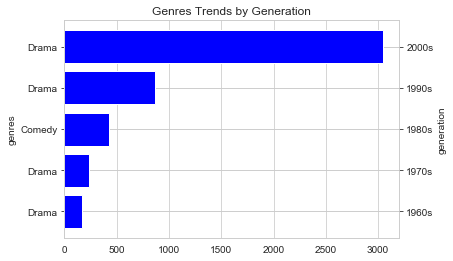

In [56]:
# Setting positions
generation = ['1960s', '1970s', '1980s', '1990s', '2000s']
genres = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()

# Setting y1: the keywords number
y1 = df_r3.top

# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top

#plot the bar
ax.barh(y_pos,y1, color = 'b')

#set the left side y axis ticks position
ax.set_yticks(y_pos)

#set the left side y axis tick label
ax.set_yticklabels(genres)

#set left side y axis label
ax.set_ylabel('genres')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()

#plot the bar
ax2.barh(y_pos,y2, color = 'b')

#set the right side y axis ticks position
ax2.set_yticks(y_pos)

#set the right side y axis tick label
ax2.set_yticklabels(generation)

#set right side y axis label
ax2.set_ylabel('generation')

#set title
ax.set_title('Genres Trends by Generation');

**Observation**
* Drama is the most filmed in almost all generation. Only the 1980s are dominated by the comedy type.

<a id='conclusions'></a>
## Conclusions
 
1. Movie popularity trend is growing over years on average. 
2. Movies with higher revenue level are gain higher popularity in recent ten years on average. 
3. Movies with higher revenue level don't have the significant high score rating in recent ten years.
4. Properties that are associated with high popularity movies.
   - High budget levels and longer run time are associated with high popularity.
   - Cast associated with high popularity movies are Robert De Niro and Bruce Willis.
   - Director associated with high popularity movies are Steven Spielberg. 
   - Genres associated with high popularity movies are drama, comedy, and thriller.
   - Keywords associated with high popularity movies are based on novel
   - Producer associated with high popularity movies are Warner Bros, Universal Pictures and Paramount Pictures.
5. More number of movies are releasing year by year. 
6. Keywords trends by generation
   - In 1960s and 1970s, the top keywords was based on novel.<br>
   - In 1980s, the top keyword was nudity. <br>
   - In 1990s, independent film became the top keyword. <br>
   - In 2000s, the movie with the feature woman director were released most. 
7. Genre Drama are the most filmed in almost all generation. Only the 1980s are dominated by the comedy genre.

<a id='limitation'></a>
## Limitation

1. I assume the zero values in revenue and budget column are missing.
2. The popularity doesn't have the upperbound due to which there is high probability of having outliers.
3. Not sure about the budgets and revenues all in US dollars.
4. I discussed the distribution of popularity in different revenue levels in recent ten years, but I cut the revenue levels based on it's quantile value. I did not find out the whole revenue distributin  so there may exist risks that the high revenue level still cover a wide of range, and may affect the final result. 
5. I did not count the number of votes into consideration, so the rating score may be a bias when the vote number is few.

<a id='resources'></a>
## Resources

* [What Makes a Movie Successful : Using Analytics
to Study Box Office Hits](https://trace.tennessee.edu/cgi/viewcontent.cgi?article=3282&context=utk_chanhonoproj)

* [Binning Data with Pandas qcut and cut](https://pbpython.com/pandas-qcut-cut.html)

* [How to quickly form groups (quartiles, deciles, etc) by ordering column(s) in a data frame](https://stackoverflow.com/questions/4126326/how-to-quickly-form-groups-quartiles-deciles-etc-by-ordering-columns-in-a)

* [Why are movies so popular?](https://www.quora.com/Why-are-movies-so-popular)